 ## <center>ENCRYPTIX_TASK 03</center>
 ### <center>IRIS FLOWER CLASSIFICATION</center>


=>The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. We have the measurements of Iris flowers categorized by their respective species.Our objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

=> Iris dataset is used  to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. 

In [6]:
from sklearn.datasets import load_iris
import pandas as pd


## Loading the data set

In [10]:
# Load the dataset from CSV file
iris_df = pd.read_csv("IRIS.csv")

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
# Display the first few rows of the dataset
print(iris_df.head(20))

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [12]:
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## EDA

### DISTRIBUTION OF EACH FEATURE

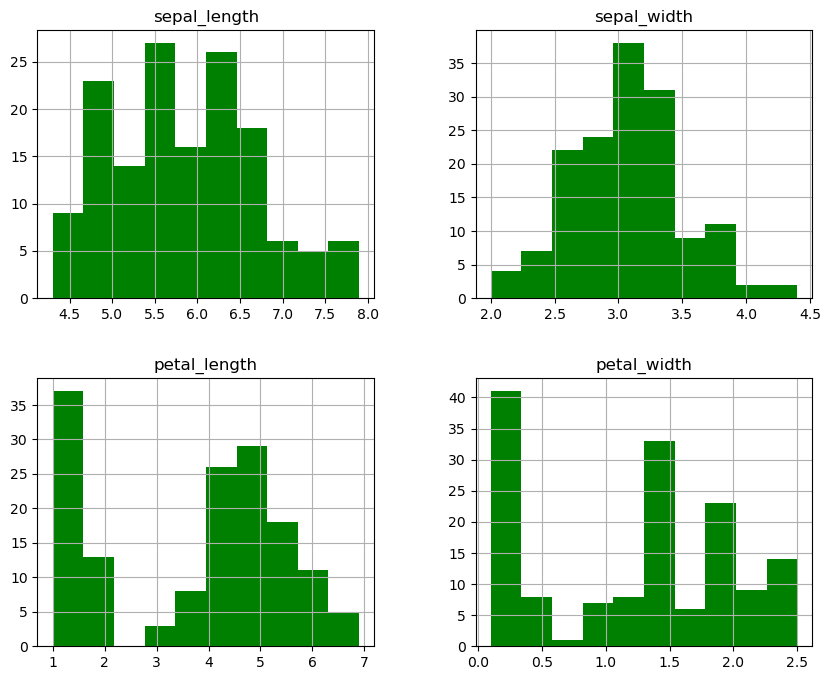

In [25]:
import matplotlib.pyplot as plt
iris_df.hist(figsize=(10, 8),color="green")
plt.show()

### PAIRPLOT TO VISUALIZE RELATIONSHIPS

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


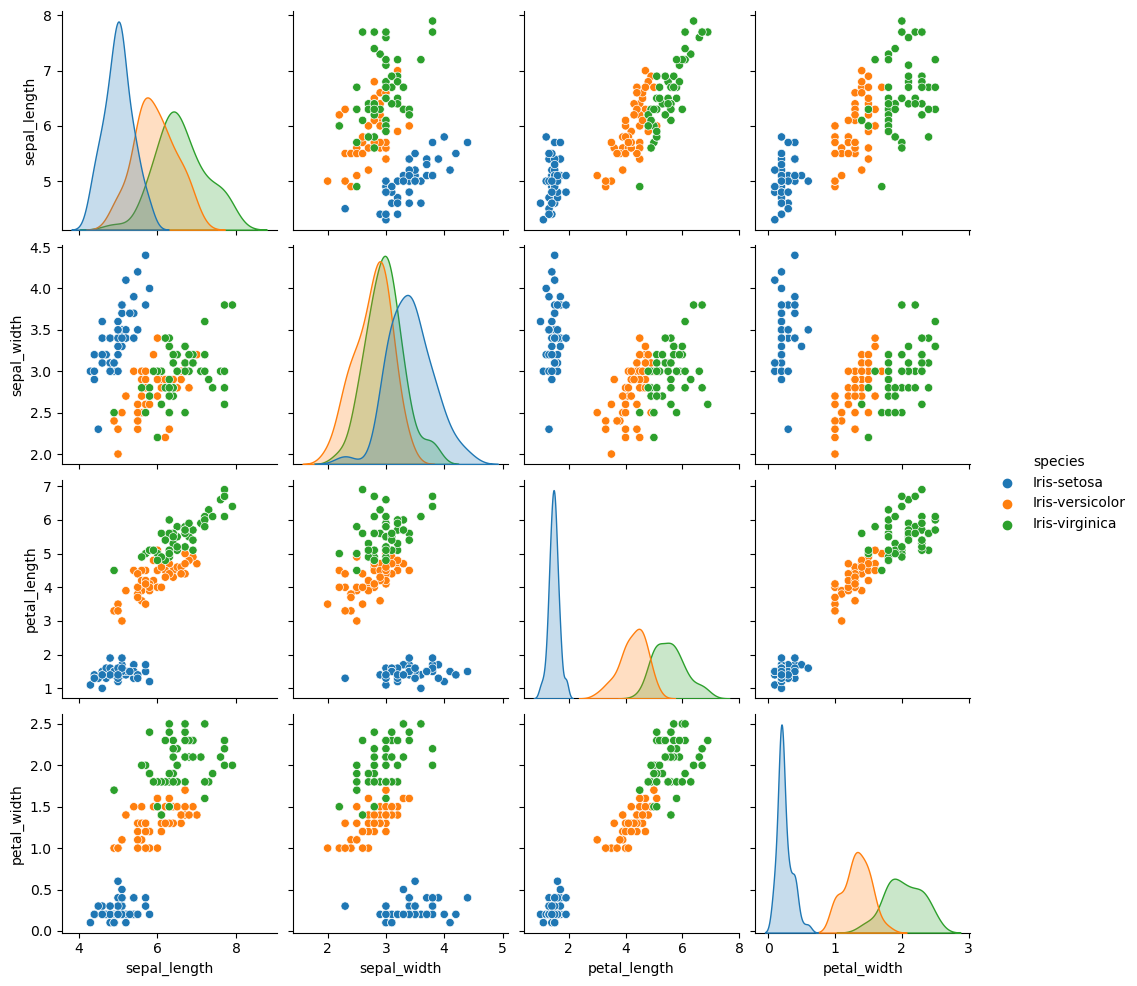

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species')
plt.show()


In [8]:

# Check for missing values
print(iris_df.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### BOX PLOT TO IDENTIFY OUTLIERS

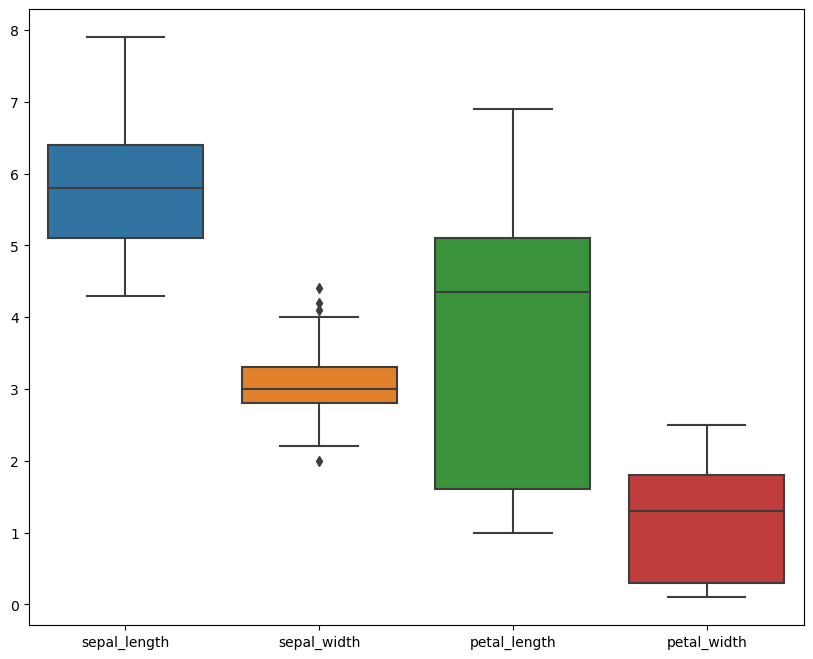

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df)
plt.show()

### VIOLIN PLOT FOR FEATURE DISTRIBUTION BY SPECIES

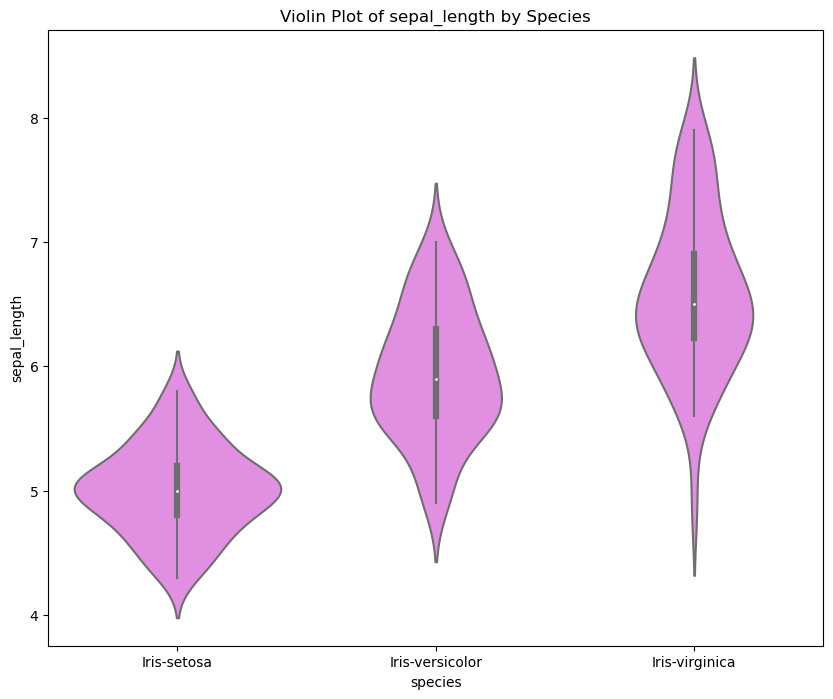

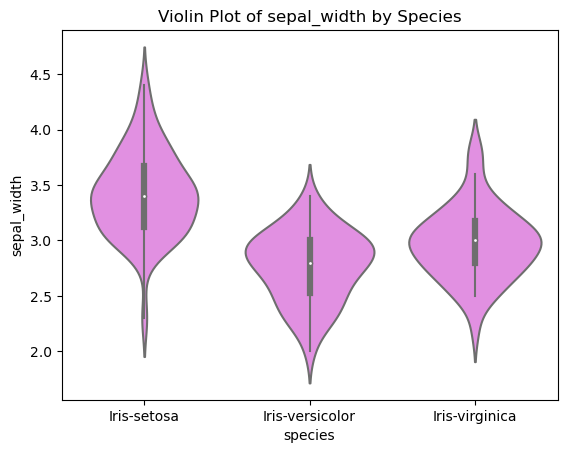

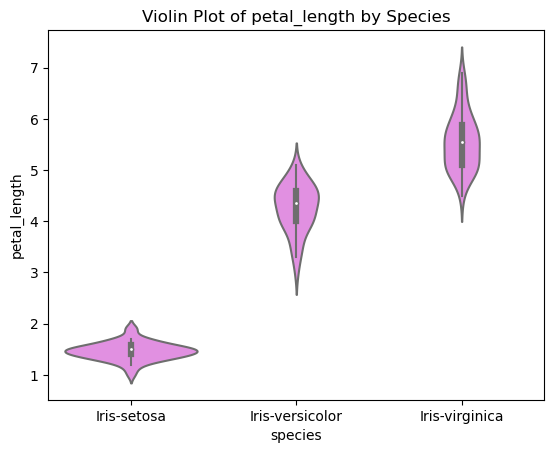

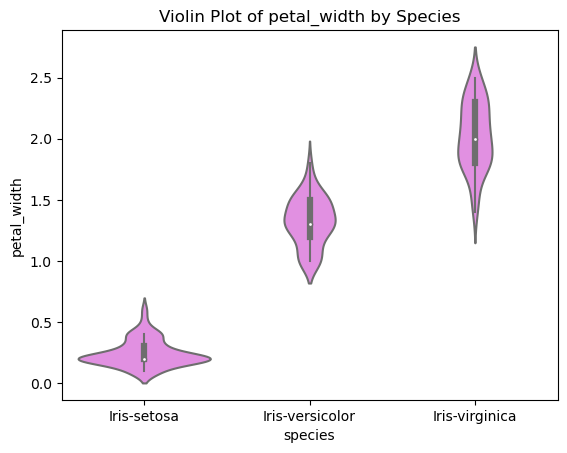

In [24]:
plt.figure(figsize=(10, 8))
for feature in iris_df.columns[:-1]:
    sns.violinplot(x='species', y=feature, data=iris_df, color="violet")
    plt.title(f'Violin Plot of {feature} by Species')
    plt.show()

### CORRELATION HEATMAP

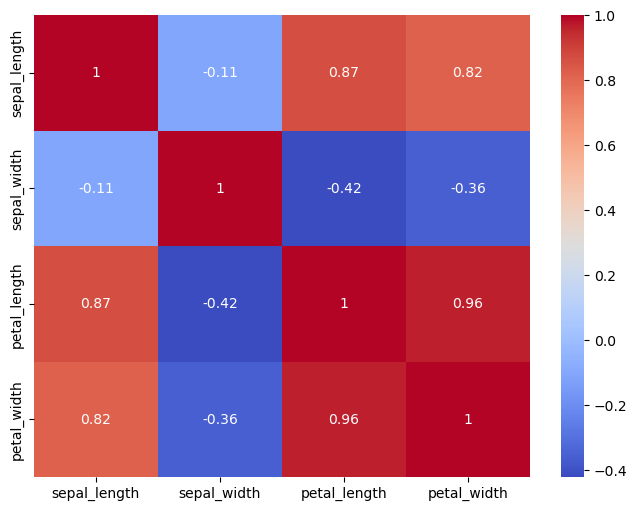

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.show()

### SCATTER PLOT WITH REGRESSION LINE

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


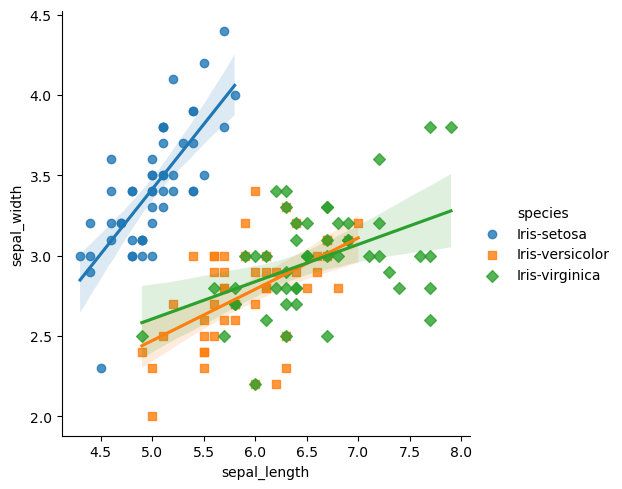

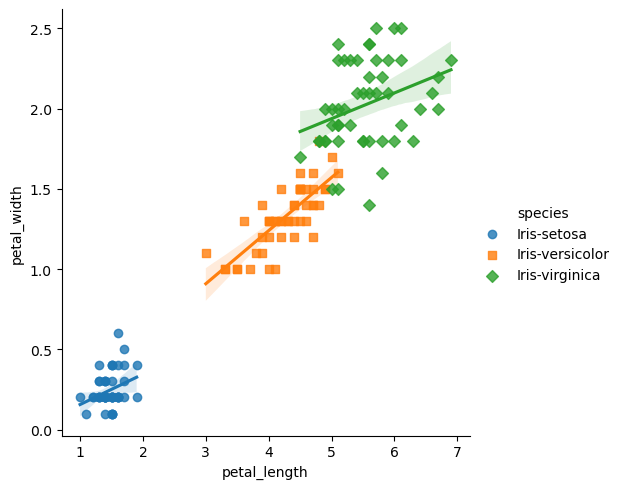

In [27]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris_df, hue='species', markers=['o', 's', 'D'])
sns.lmplot(x='petal_length', y='petal_width', data=iris_df, hue='species', markers=['o', 's', 'D'])
plt.show()

### FACETGRID FOR FEATURE COMPARISON BY SPECIES

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


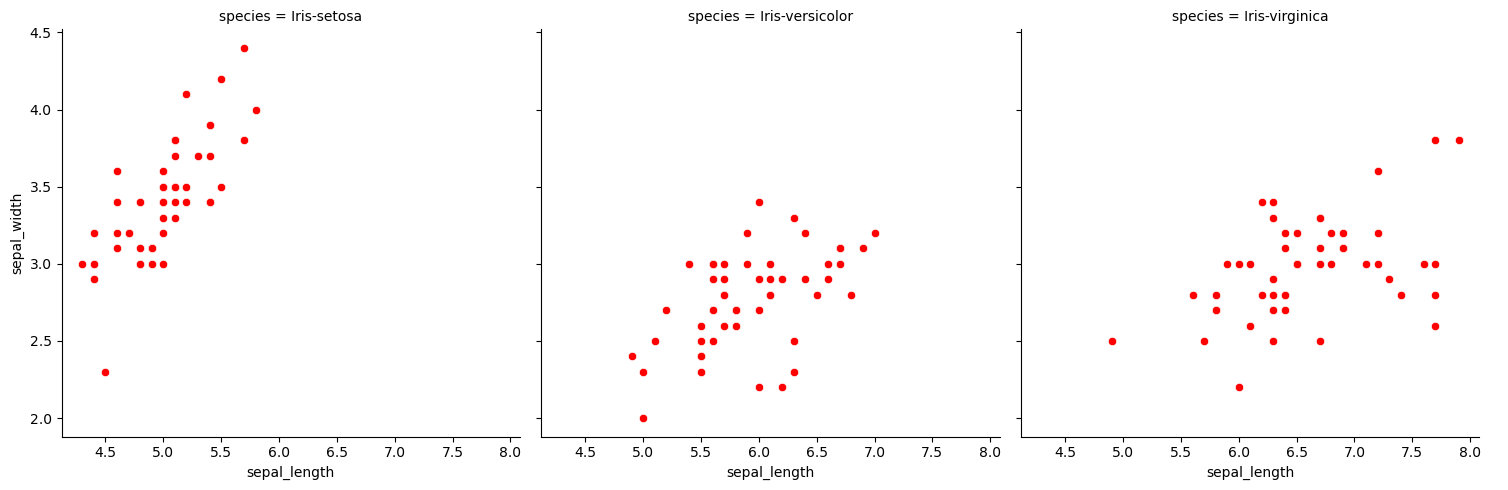

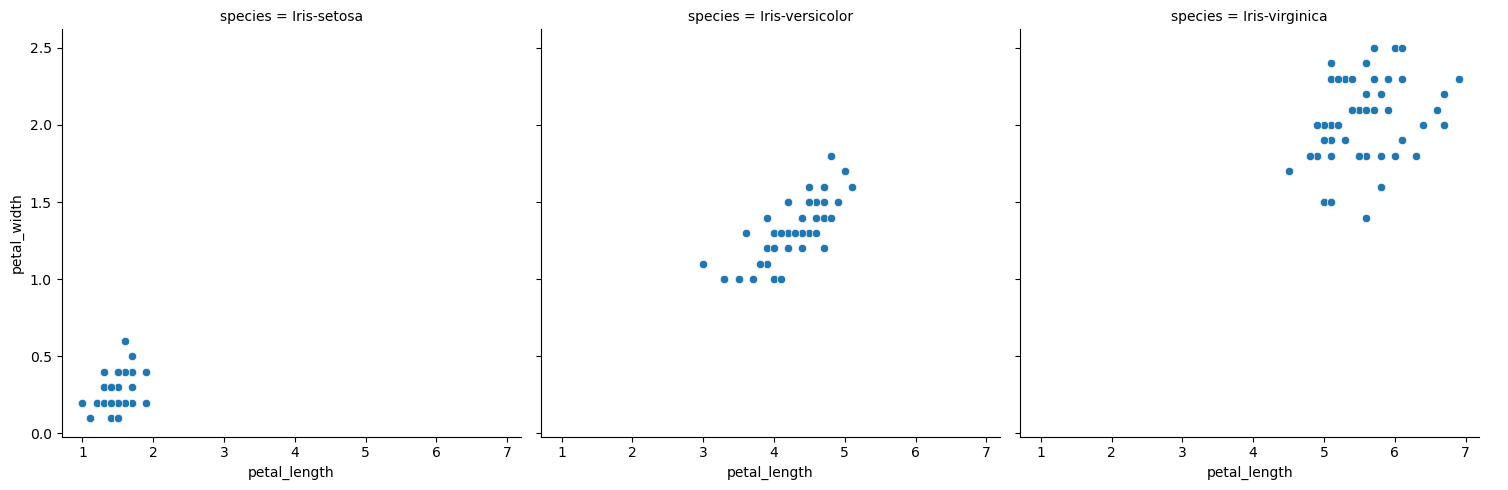

In [23]:
g = sns.FacetGrid(iris_df, col="species", height=5)
g.map_dataframe(sns.scatterplot, x="sepal_length", y="sepal_width", color="red")
g.add_legend()

g = sns.FacetGrid(iris_df, col="species", height=5)
g.map_dataframe(sns.scatterplot, x="petal_length", y="petal_width")
g.add_legend()

plt.show()

## DATA PREPROCESSING

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

 ### SPLITTING DATA

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL BUILDING

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## MODEL EVALUATION

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)
y_pred


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## MAKING PREDICTIONS

In [22]:
# Example: Predicting the species for new flower measurements
new_measurements = [[5.1, 3.5, 1.4, 0.2]]  # Example features
new_measurements_scaled = scaler.transform(new_measurements)
predicted_species = model.predict(new_measurements_scaled)
print("Predicted Species:", predicted_species[0])


Predicted Species: Iris-setosa


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Example: Predicting the species for new flower measurements
new_measurements = [[6.5, 3.0, 5.5, 2.0]]  # Example features
new_measurements_scaled = scaler.transform(new_measurements)
predicted_species = model.predict(new_measurements_scaled)
print("Predicted Species:", predicted_species[0])


Predicted Species: Iris-virginica


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
